In [1]:
from netCDF4 import Dataset
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.ticker as mplticker
import matplotlib.colors as colors
import matplotlib.image as image
from matplotlib.offsetbox import OffsetImage,AnchoredOffsetbox
import cartopy.crs as ccrs
%matplotlib inline

/global/homes/s/srai/.conda/envs/mpiNetCDF/lib/python3.9/site-packages/pyproj/__init__.py:89: UserWarning: pyproj unable to set database path.
  _pyproj_global_context_initialize()


In [2]:
def streamplotInAxesWithArrows(ax, X, Y, U, V):
    strmlines = ax.streamplot(X, Y, U, V, color='k', density= 4, linewidth=1, arrowstyle = '->',arrowsize = 1)
    #cbar = plt.colorbar(strmlines.lines, ax = ax)
    
def plotStreamOverArr(ax, X, Y, pltArr, 
                      U, V, 
                      d, cmap, 
                      cbTitle, txt, 
                      figLabel, 
                      cb=True, 
                      greaterThan = 'True',
                      lessThan = 'True'):
    levels = 150
    level_boundaries = np.linspace(-d, d, levels)
    norm = mpl.colors.BoundaryNorm(level_boundaries, cmap.N)
    
    extd = 'neither'
    if greaterThan and lessThan:
        extd = 'both'
    elif greaterThan:
            extd = 'min'
    elif lessThan:
            extd = 'max'
            
    m = ax.pcolormesh(X, Y, pltArr, vmin=-d, vmax=d, cmap=cmap, rasterized=True)
#     m = ax.contourf(X-0.5, Y-0.5, pltArr, levels = level_boundaries, cmap=cmap, norm = norm, extend=extd,
#                             rasterized=True, vmin = -d, vmax = d)
    if cb:
        cbTitle = r'$mWatts/m^2$'
        cb = plt.colorbar(m, ax=ax, extend='both')
        cb.ax.tick_params(labelsize=12)
        cb.ax.set_title(cbTitle, size=12, pad = 20)

    xpos = 0.5
    ypos = 0.85
    fsize = 12

    t = ax.text(xpos, ypos, txt, horizontalalignment='center', fontweight = 'heavy', color ='white' ,
                        verticalalignment='center', transform=ax.transAxes, fontsize=fsize)
    t.set_bbox(dict(facecolor='black', alpha=1, edgecolor=None))

    xpos, ypos = 0.1, 0.85
    t = ax.text(xpos, ypos, figLabel, horizontalalignment='center',
             verticalalignment='center', transform=ax.transAxes, 
            fontsize = 12, weight='heavy', color='white')
    t.set_bbox(dict(facecolor='black', alpha=1, edgecolor=None))


    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    streamplotInAxesWithArrows(ax, X, Y, U, V)
    
def plt2d(ax, pltArr, d, cmap, cbTitle, txt, figLabel, cb=True):
    m = ax.pcolormesh(pltArr, vmin=-d, vmax=d, cmap=cmap, rasterized=True)
    if cb:
        cbTitle = r'$mWatts/m^2$'
        cb = plt.colorbar(m, ax=ax, extend='both')
        cb.ax.tick_params(labelsize=12)
        cb.ax.set_title(cbTitle, size=12, pad = 20)


    xpos = 0.5
    ypos = 0.85
    fsize = 12

    t = ax.text(xpos, ypos, txt, horizontalalignment='center', fontweight = 'heavy',  color ='white' ,
                        verticalalignment='center', transform=ax.transAxes, fontsize=fsize)
    t.set_bbox(dict(facecolor='black', alpha=1, edgecolor=None))
    
    xpos, ypos = 0.1, 0.85
    t = ax.text(xpos, ypos, figLabel, horizontalalignment='center',
             verticalalignment='center', transform=ax.transAxes, 
            fontsize = 12, weight='heavy', color='white')
    t.set_bbox(dict(facecolor='black', alpha=1, edgecolor=None))

    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

In [3]:
def getPlotsAvgAndInst(ellList, ell, tavgData, instData, unfilt_UVEL, unfilt_VVEL, UAREA, 
                       x1= 0, x2 =100, y1= 0, y2 = 100,full=True, strmPlot=False):
    
    ellIdx = ellList.index(ell)
    offset = int(0.5 * 100/6.5)
    
    print(offset)
    
    iNLM_rot = instData[ellIdx,3,:,:]
    iNLM_str = instData[ellIdx,4,:,:]
    
    iEPPA = instData[ellIdx,0,:,:]
    iNLM_tot1 = instData[ellIdx,1,:,:]
    
    NLM_rot = tavgData[ellIdx,3,:,:]
    NLM_str = tavgData[ellIdx,4,:,:]
    
    EPPA = tavgData[ellIdx,0,:,:]
    NLM_tot1 = tavgData[ellIdx,1,:,:]

    if full:
        y1, y2 = 0+offset, 434-offset
        x1, x2 = 0+offset, 1120-offset
        
    X, Y = np.meshgrid(np.arange(x2-x1), np.arange(y2-y1))

    U = unfilt_UVEL[y1:y2, x1:x2].copy()
    V = unfilt_VVEL[y1:y2, x1:x2].copy()

    ratio = 1#2.578 #2.729

    fig, axes = plt.subplots(nrows=4, ncols=2, figsize=(12,16))

    cmap = plt.get_cmap('seismic').copy()
    cmap.set_bad('k')


    ##########################################################################
    d = 3
    ax = axes[0,0]
    pltArr = iEPPA[y1:y2, x1:x2].copy()
    
    p  = pltArr.flatten()
    
    mask1 = np.isnan(p) + (p == 0.0)
    
    txt = r'$\mathbf{EP} = $' + '{0:5.0f} MW'.format(np.nansum(pltArr*UAREA[y1:y2, x1:x2])/1e6) 
    cbTitle = r'$mWatts/m^2$'
    if strmPlot:
        plotStreamOverArr(ax, X, Y, pltArr*1e3, U, V, d, cmap, cbTitle, txt, 'A', cb=True)
    else:
        plt2d(ax, pltArr*1e3, d, cmap, cbTitle, txt, 'A')




    ###########################################################################
    d = 3
    ax = axes[0,1]
    pltArr = iNLM_tot1[y1:y2, x1:x2].copy()
    q = pltArr.flatten()
    
    mask2 = np.isnan(q) + (q == 0.0)
    mask = mask1 + mask2
    
    r = np.corrcoef(p[~mask],q[~mask])[0,1]
    
    txt1 = ' r = {0:5.3f} '.format(r)
    txt = r'$\mathbf{\widetilde{EP}} = $' + '{0:5.0f} MW'.format(np.nansum(pltArr*UAREA[y1:y2, x1:x2])/1e6) + txt1
    cbTitle = r'$mWatts/m^2$'
    if strmPlot:
        plotStreamOverArr(ax, X, Y, pltArr*1e3, U, V, d, cmap, cbTitle, txt, 'B', cb=True)
    else:
        plt2d(ax, pltArr*1e3, d, cmap, cbTitle, txt, 'B')



    ############################### Time Average PLOT #########################

    d = 4
    ax =axes[1,0]

    pltArr = EPPA[y1:y2, x1:x2].copy()
    p  = pltArr.flatten()
    mask1 = np.isnan(p) + (p == 0.0)
    
    txt = r'time Avg $\mathbf{EP} = $' + '{0:5.0f} MW'.format(np.nansum(pltArr*UAREA[y1:y2, x1:x2])/1e6) 
    cbTitle = r'$mWatts/m^2$'
    plt2d(ax, pltArr*1e3, d, cmap, cbTitle, txt, 'C')


    #######################################################
    
    d = 4
    ax =axes[1, 1]
    pltArr = NLM_tot1[y1:y2, x1:x2].copy()
    
    q = pltArr.flatten()
    
    mask2 = np.isnan(q) + (q == 0.0)
    mask = mask1 + mask2
    
    r = np.corrcoef(p[~mask],q[~mask])[0,1]
    
    txt1 = ' r = {0:5.3f} '.format(r)
    txt = r'time Avg $\mathbf{\widetilde{EP}} = $' + '{0:5.0f} MW'.format(np.nansum(pltArr * UAREA[y1:y2, x1:x2])/1e6) + txt1
    cbTitle = r'$mWatts/m^2$'
    plt2d(ax, pltArr*1e3, d, cmap, cbTitle, txt, 'D')
    
    
    #######################################################
    
    ##########################################################################
    # DECOMPOSITION
    ##########################################################################
    d = 3
    ax = axes[2,0]
    pltArr = iNLM_rot[y1:y2, x1:x2].copy()
    txt = r'$\mathbf{\widetilde{EP}^{skw}} = $' + '{0:5.0f} MW'.format(np.nansum(pltArr*UAREA[y1:y2, x1:x2])/1e6) 
    cbTitle = r'$mWatts/m^2$'
    if strmPlot:
        plotStreamOverArr(ax, X, Y, pltArr*1e3, U, V, d, cmap, cbTitle, txt, 'A', cb=True)
    else:
        plt2d(ax, pltArr*1e3, d, cmap, cbTitle, txt, 'A')




    ###########################################################################
    d = 3
    ax = axes[2,1]
    pltArr = iNLM_str[y1:y2, x1:x2].copy()
    txt = r'$\mathbf{\widetilde{EP}^{sym}} = $' + '{0:5.0f} MW'.format(np.nansum(pltArr*UAREA[y1:y2, x1:x2])/1e6) 
    cbTitle = r'$mWatts/m^2$'
    if strmPlot:
        plotStreamOverArr(ax, X, Y, pltArr*1e3, U, V, d, cmap, cbTitle, txt, 'B', cb=True)
    else:
        plt2d(ax, pltArr*1e3, d, cmap, cbTitle, txt, 'B')



    ############################### Time Average PLOT #########################

    d = 4
    ax =axes[3,0]

    pltArr = NLM_rot[y1:y2, x1:x2].copy()
    txt = r'time Avg $\mathbf{\widetilde{EP}^{skw}} = $' + '{0:5.0f} MW'.format(np.nansum(pltArr*UAREA[y1:y2, x1:x2])/1e6) 
    cbTitle = r'$mWatts/m^2$'
    plt2d(ax, pltArr*1e3, d, cmap, cbTitle, txt, 'C')


    #######################################################
    
    d = 4
    ax =axes[3, 1]
    pltArr = NLM_str[y1:y2, x1:x2].copy()
    txt = r'time Avg $\mathbf{\widetilde{EP}^{sym}} = $' + '{0:5.0f} MW'.format(np.nansum(pltArr * UAREA[y1:y2, x1:x2])/1e6) 
    cbTitle = r'$mWatts/m^2$'
    plt2d(ax, pltArr*1e3, d, cmap, cbTitle, txt, 'D')
    
    
    #######################################################
    plt.suptitle('{0:d} km'.format(ell), fontsize = 40, fontweight = 'heavy')
    
    plt.tight_layout()
    #plt.subplots_adjust(left=0.01, right=0.98, bottom=0.01, top = 0.96,hspace=0.1, wspace=0.02)
    plt.savefig('romsWRF_{0:04d}km.jpg'.format(ell), format='jpg', dpi=70)

In [4]:
rootFold = '/pscratch/sd/s/srai/ROMSwithWRF/run/'

gridDS= Dataset(rootFold + 'input/ROMSgrid.nc')
UAREA = np.array(gridDS.variables['UAREA'])
ULAT = np.array(gridDS.variables['ULAT'])
ULONG = np.array(gridDS.variables['ULONG'])


def getTimeAvgData(ellinkm = 100):
    ds1 = Dataset(rootFold + f'output/{ellinkm}km/1to200/tavgFiltered_{ellinkm:04d}.nc')
    ds2 = Dataset(rootFold + f'output/{ellinkm}km/1to200/tavgNLmodelEP_{ellinkm:04d}km.nc')

    NLM_tot = np.array(ds2.variables['NLmodel_EPCg'][0,:,:])
    NLM2_tot = np.array(ds2.variables['NLmodel2_EPCg'][0,:,:])

    NLM_rot = np.array(ds2.variables['NLmodel_EPCg_rot'][0,:,:])
    NLM_str = np.array(ds2.variables['NLmodel_EPCg_strain'][0,:,:])

    EPPA = np.array(ds1.variables['EddyPowerPerArea'][0,:,:])

    landMask = EPPA == 0.0
    landMask = landMask + np.isnan(NLM2_tot)

    NLM_tot[landMask] = float('nan')
    NLM2_tot[landMask] = float('nan')
    NLM_rot[landMask] = float('nan')
    NLM_str[landMask] = float('nan')
    
    EPPA[landMask] = float('nan')
    
    return np.stack((EPPA, NLM_tot, NLM2_tot, NLM_rot, NLM_str, landMask), axis=0)


def getInstData(ellinkm=100, timeIndex=0, landMask=False):
    dsEPPA_inst = Dataset(rootFold + f'output/{ellinkm}km/1to200/filtered_{ellinkm:04d}.nc')
    dsNLM_inst = Dataset(rootFold + f'output/{ellinkm}km/1to200/NLmodelEP_{ellinkm:04d}km.nc')

    iNLM_tot = np.array(dsNLM_inst.variables['NLmodel_EPCg'][timeIndex,:,:])
    iNLM2_tot = np.array(dsNLM_inst.variables['NLmodel2_EPCg'][timeIndex,:,:])

    iNLM_rot = np.array(dsNLM_inst.variables['NLmodel_EPCg_rot'][timeIndex,:,:])
    iNLM_str = np.array(dsNLM_inst.variables['NLmodel_EPCg_strain'][timeIndex,:,:])

    iEPPA = np.array(dsEPPA_inst.variables['EddyPowerPerArea'][timeIndex,:,:])

    # iNLM_tot[landMask] = float('nan')
    # iNLM2_tot[landMask] = float('nan')
    # iNLM_rot[landMask] = float('nan')
    # iNLM_str[landMask] = float('nan')
    # iEPPA[landMask] = float('nan')
    
    return np.stack((iEPPA, iNLM_tot, iNLM2_tot, iNLM_rot, iNLM_str), axis=0)

def getUnfiltDataInst(timeIndex=0):
    dsUnfilt_inst = Dataset(rootFold+ 'input/ROMS_withWRF_data.nc')
    unfilt_UVEL = np.array(dsUnfilt_inst.variables['uo'][timeIndex,:,:])
    unfilt_VVEL = np.array(dsUnfilt_inst.variables['vo'][timeIndex,:,:])

    return unfilt_UVEL, unfilt_VVEL


def getCorrTimeSeries(ell):
    ellIdx = ellList.index(ell)
    offset = int(0.5 * 100/6.5)
    
    y1, y2 = 0+offset, 434-offset
    x1, x2 = 0+offset, 1120-offset
    
    
    r  = np.zeros((200,), dtype=float)
    for i in range(200):
        
        instData = getInstData(ellinkm=ell, timeIndex=0, landMask=False)
        EPPA = instData[0,y1:y2,x1:x2].copy()
        NLM = instData[1,y1:y2,x1:x2].copy()
        
        x  = EPPA.flatten()
        y  = NLM.flatten()
        
        maskx =x == 0 
        maskx += np.isnan(x)
        
        masky =y == 0 
        masky += np.isnan(y)
        
        mask =maskx + masky
        
        r[i] = np.corrcoef(x[~mask],y[~mask])[0][1]
        
    return r
        
        
        

In [5]:
ellList = [10, 20, 50, 80, 100]

ellLen = len(ellList)
Ylen = 434
Xlen = 1120

tavgData = np.zeros((ellLen, 6, Ylen, Xlen),dtype=float)
instData = np.zeros((ellLen, 5, Ylen, Xlen),dtype=float)
rTimeSeries = np.zeros((ellLen, 200), dtype=float)

for ellIdx in range(ellLen):
    tavgData[ellIdx,:,:,:] = getTimeAvgData(ellinkm=ellList[ellIdx])
    landMask = np.array(tavgData[ellIdx,5,:,:], dtype=int)
    instData[ellIdx,:,:,:] = getInstData(ellinkm=ellList[ellIdx], timeIndex=10, landMask = landMask)
    rTimeSeries[ellIdx,:] = getCorrTimeSeries(ellList[ellIdx])
    
unfilt_UVEL, unfilt_VVEL = getUnfiltDataInst(timeIndex=10)

7
7
7
7
7


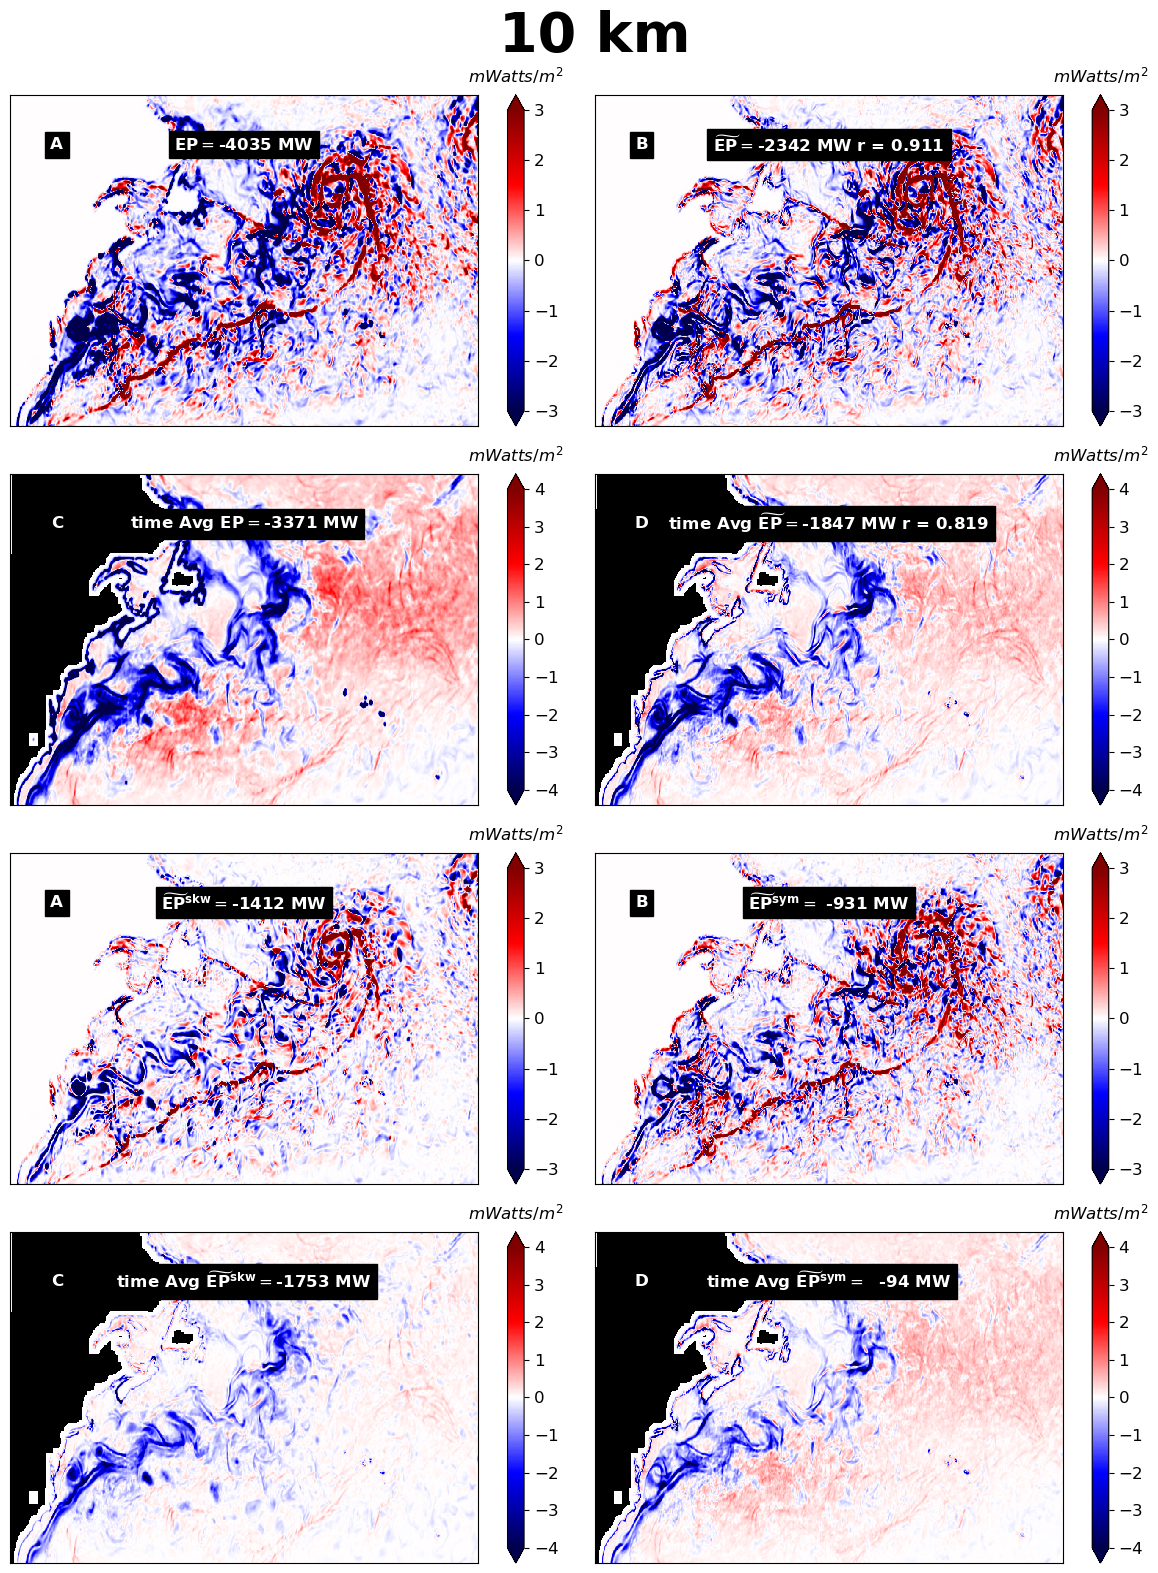

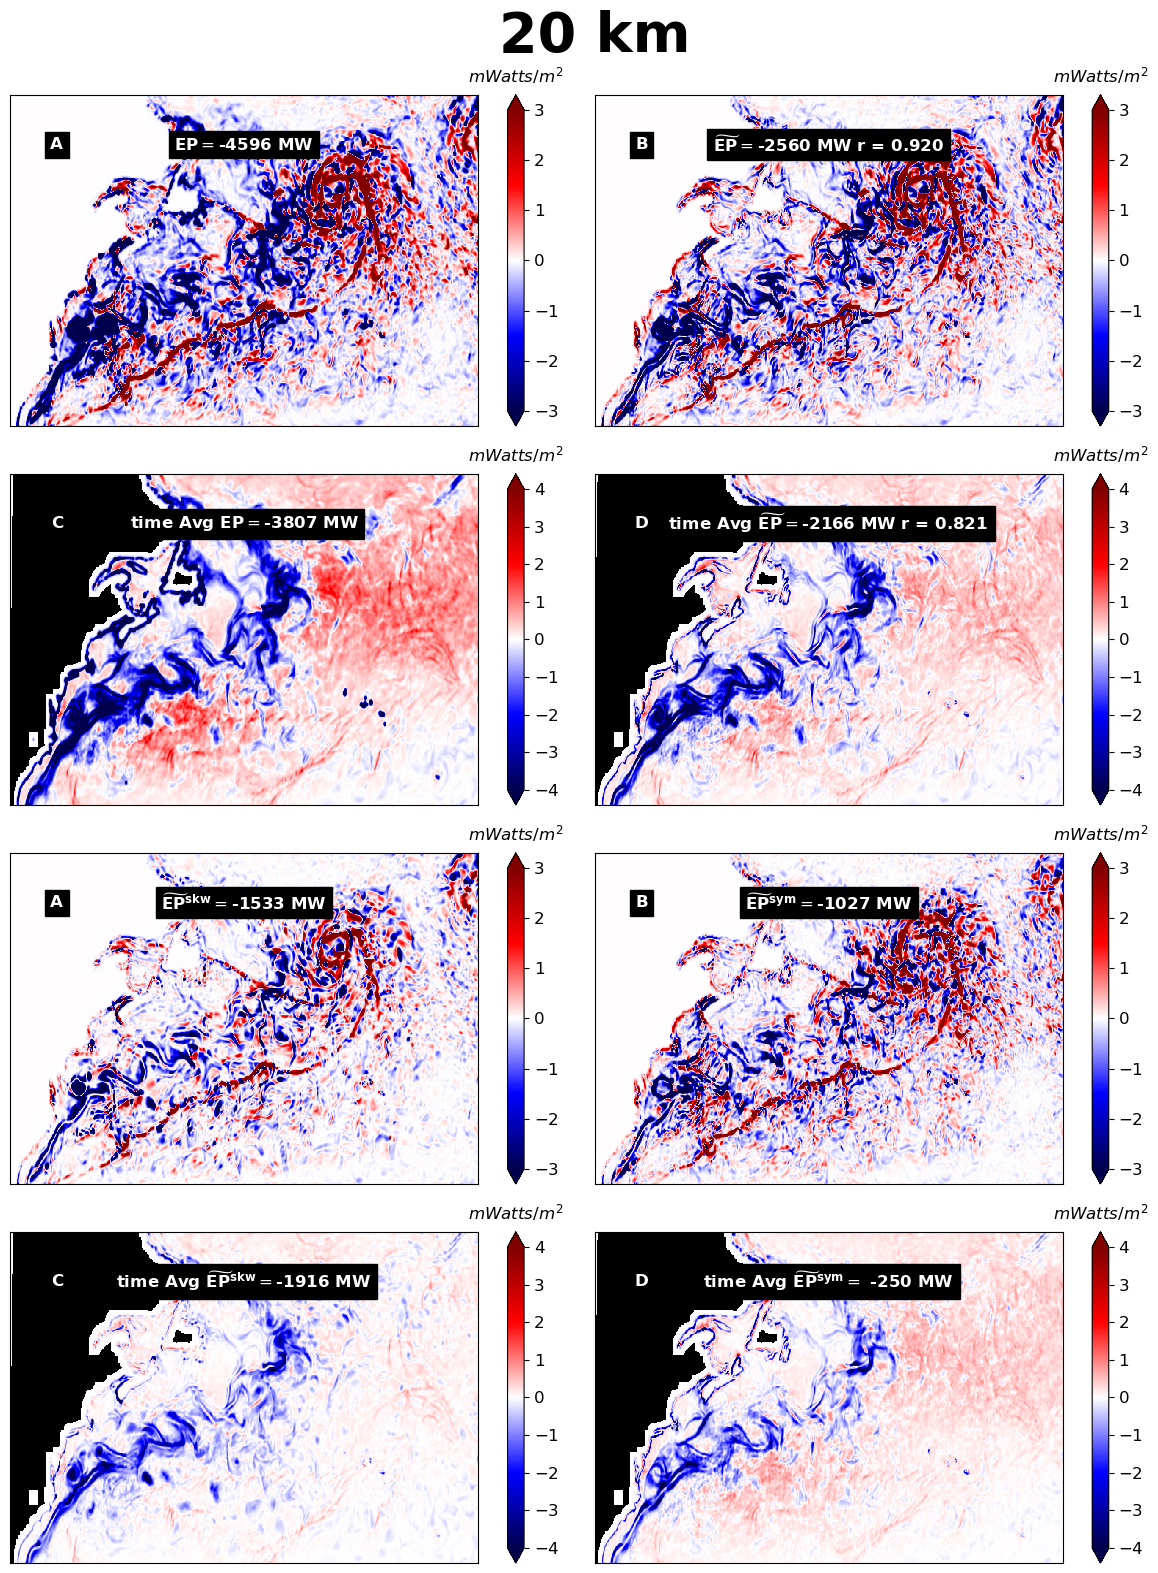

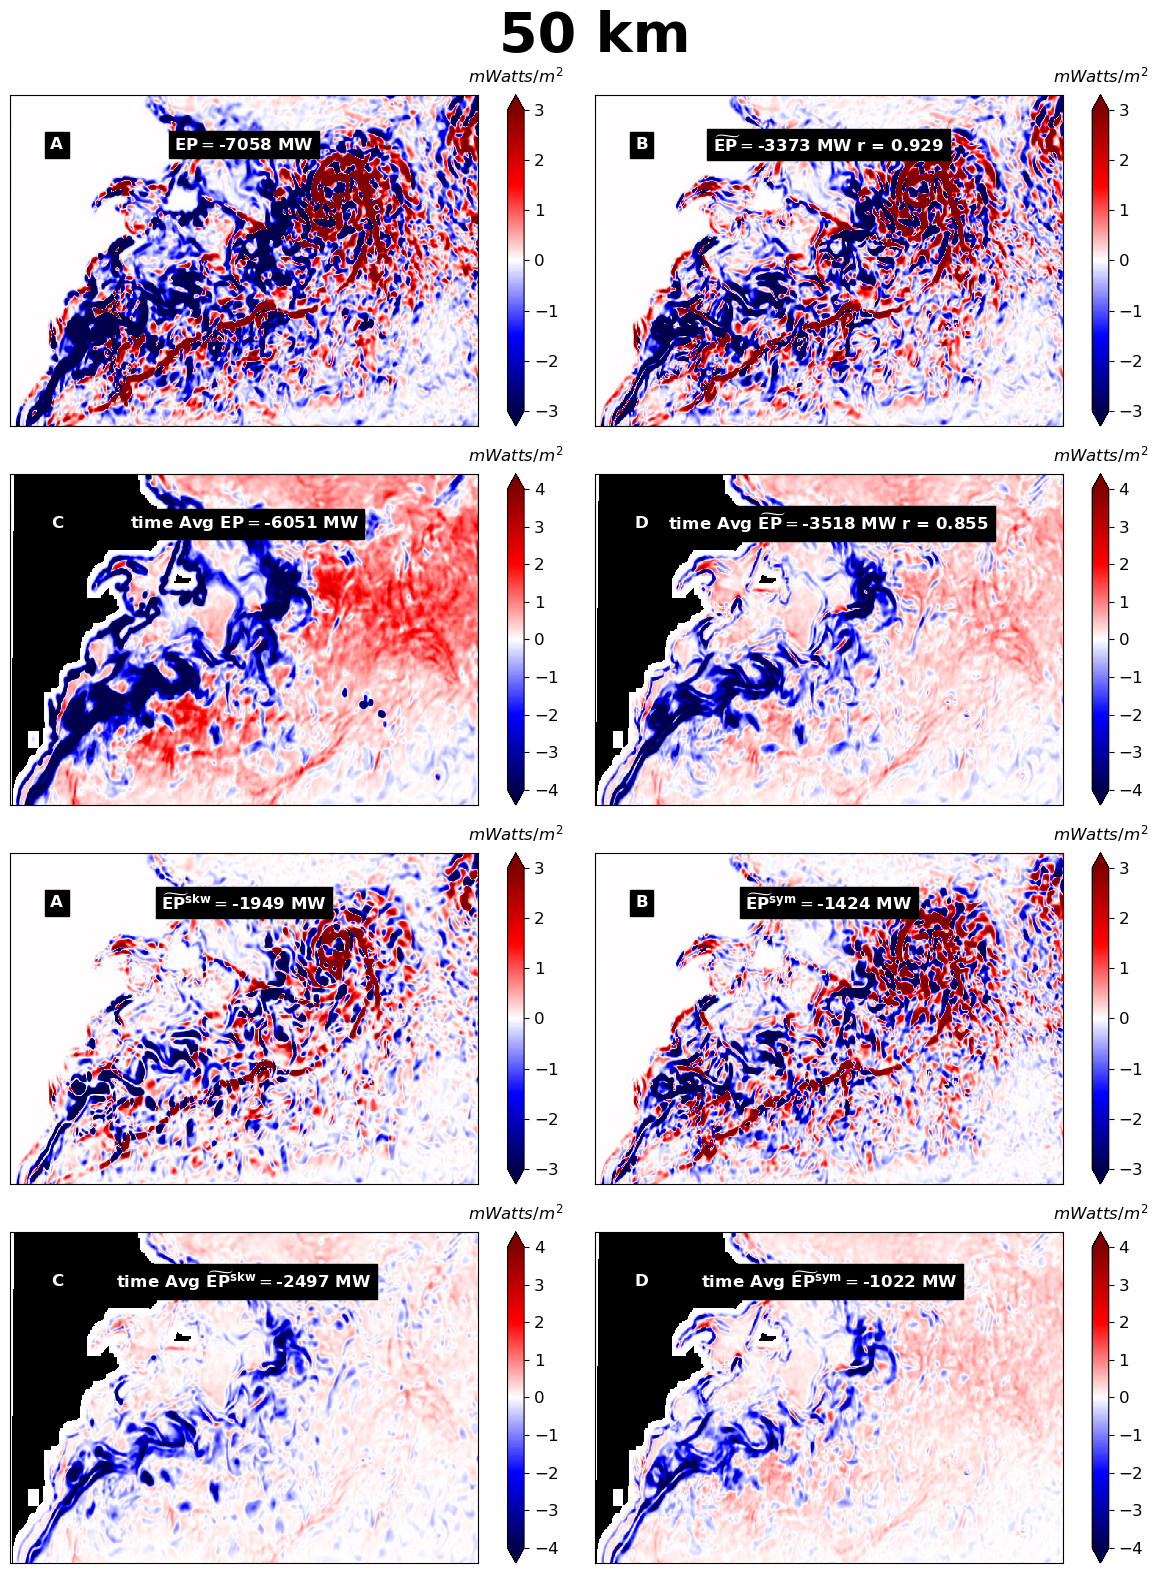

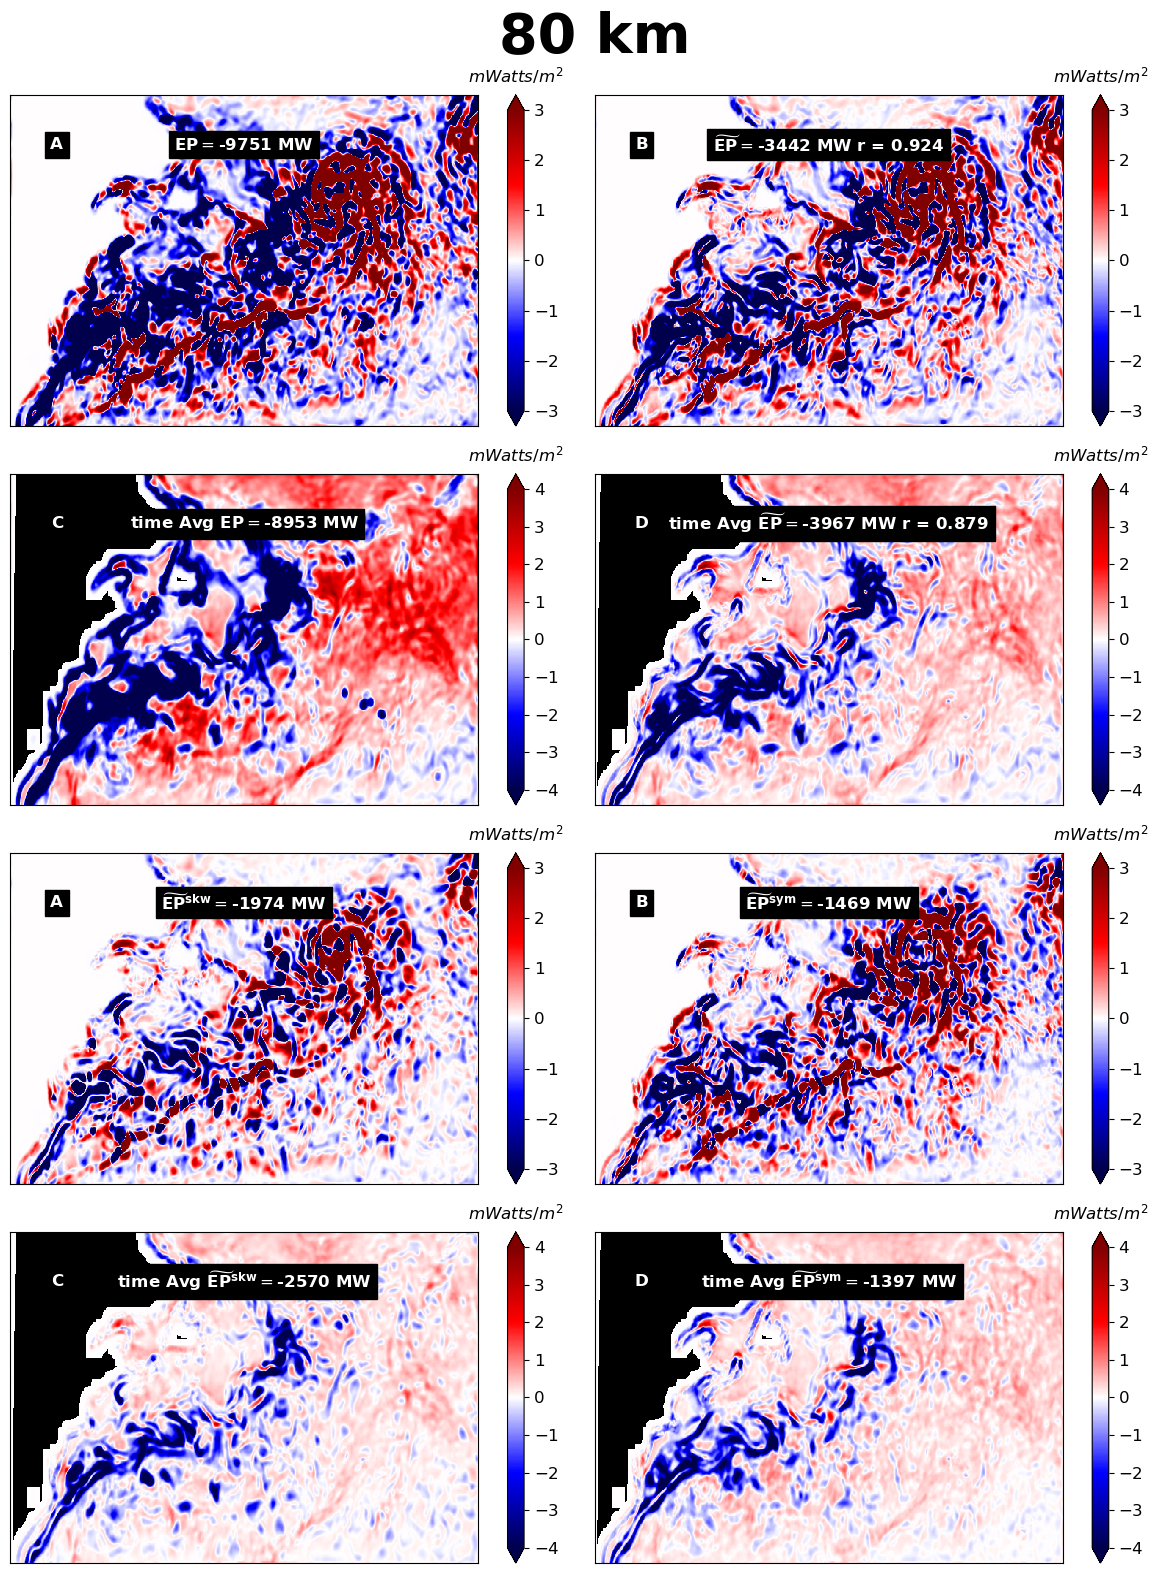

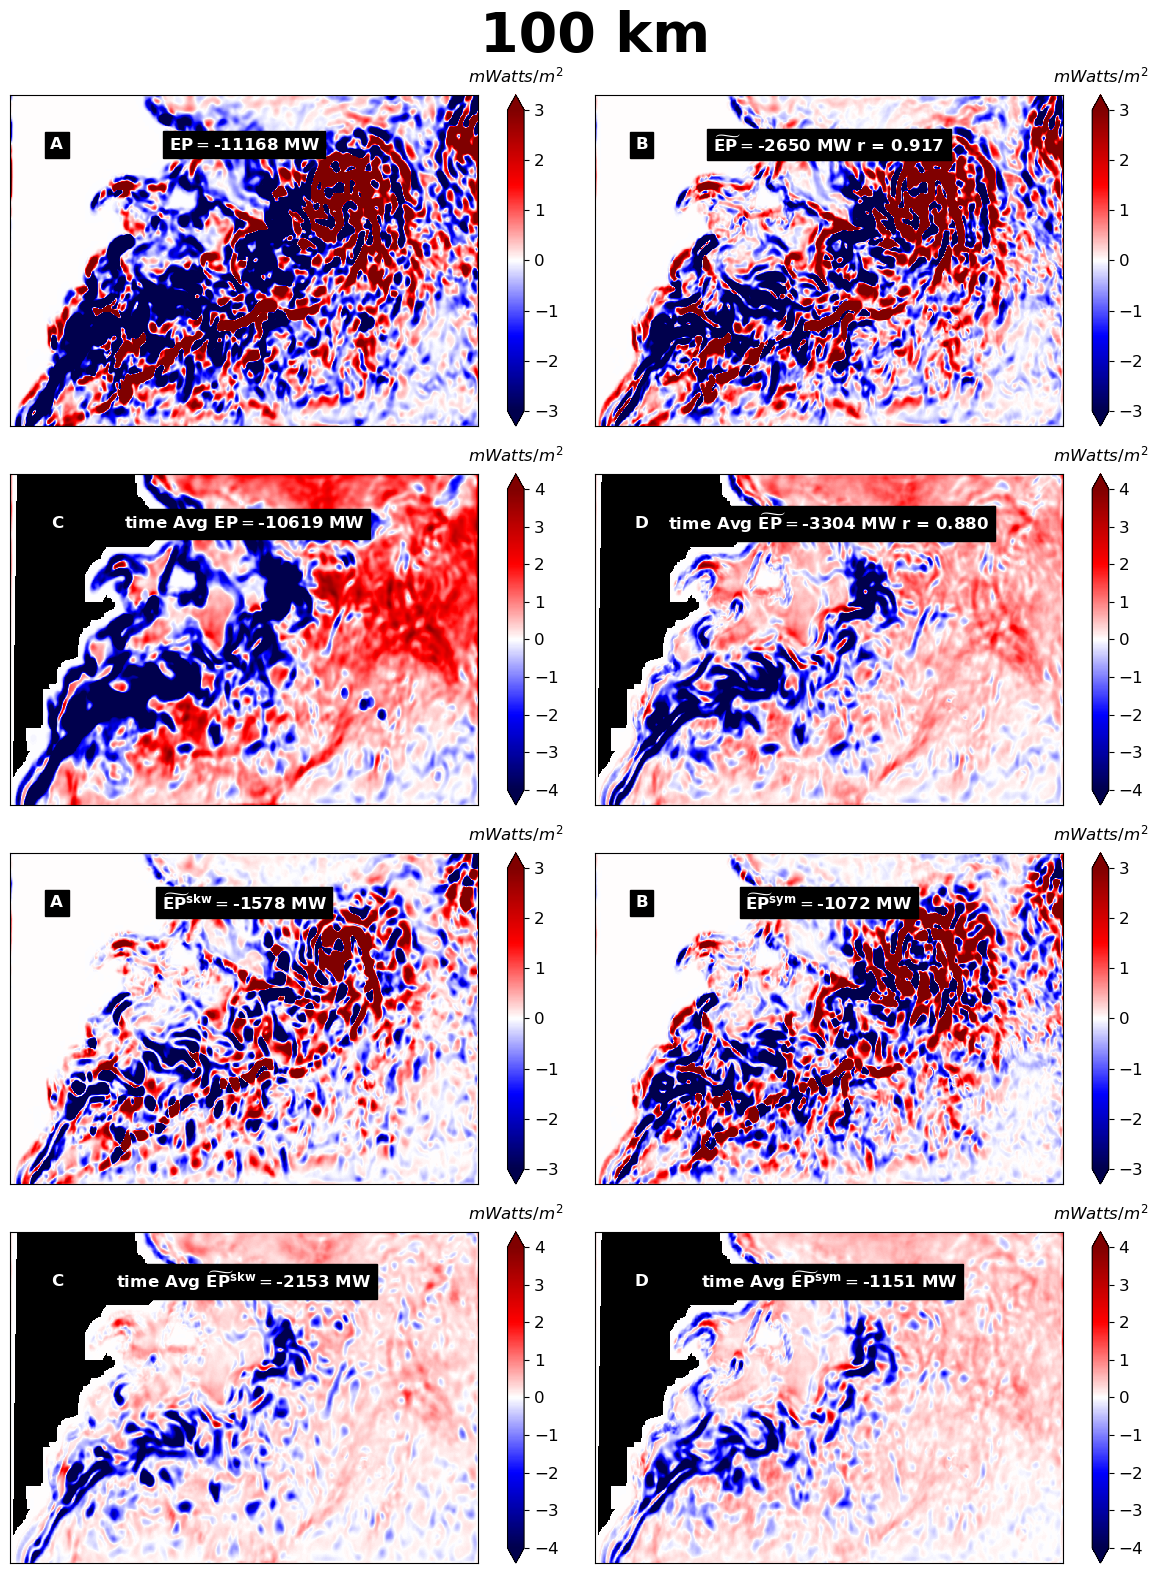

In [6]:
getPlotsAvgAndInst(ellList, 10, tavgData, instData, unfilt_UVEL, unfilt_VVEL, UAREA)
getPlotsAvgAndInst(ellList, 20, tavgData, instData, unfilt_UVEL, unfilt_VVEL, UAREA)
getPlotsAvgAndInst(ellList, 50, tavgData, instData, unfilt_UVEL, unfilt_VVEL, UAREA)
getPlotsAvgAndInst(ellList, 80, tavgData, instData, unfilt_UVEL, unfilt_VVEL, UAREA)
getPlotsAvgAndInst(ellList, 100, tavgData, instData, unfilt_UVEL, unfilt_VVEL, UAREA)

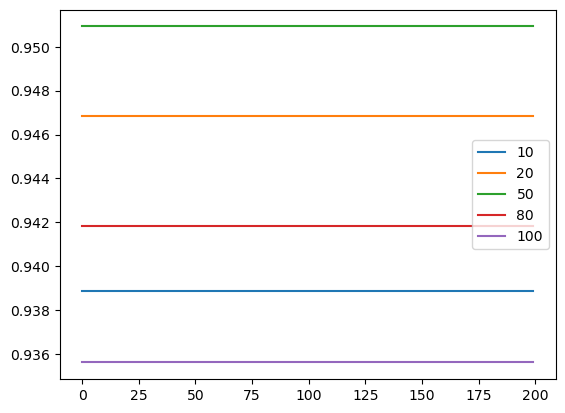

In [7]:
for ellIdx in range(ellLen):
    plt.plot(rTimeSeries[ellIdx,:], label=str(ellList[ellIdx]))
    
plt.legend()

In [52]:
a = np.linspace(-10,10,21)
a[0] = -8
a[-1] = 8
b = np.linspace( 10,50,21)
b[-1] = 60.

c = np.linspace( 0,20,21)
d = np.linspace(20,30,21)

r1 = np.corrcoef(a,c)[0][1]
r2 = np.corrcoef(b,d)[0][1]

rAvg = np.corrcoef(a+b,c+d)[0][1]


In [53]:
r1, r2, rAvg

(0.995748787433912, 0.9884301879499714, 0.9960099320820338)

In [25]:
b[-1]

50.0

In [60]:
a1 = np.array([4.5, 5., 5.8])
a2 = np.array([1., 2., 3.])

b1 = np.array([11., 12., 13.])
b2 = np.array([5.2, 5., 4.8])

r1 = np.corrcoef(a1,b1)[0][1]
r2 = np.corrcoef(a2,b2)[0][1]

rAvg = np.corrcoef(a1+a2,b1+b2)[0][1]

print(r1, r2, rAvg)

0.9912407071619304 -1.0 0.9986254289035241
